In [1]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

Populating the interactive namespace from numpy and matplotlib


beta
0.178632563535 0.566352089559 1445 189
pgeom
0.725000057647 0.938810025541 1445 189


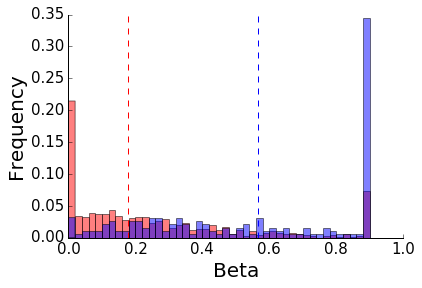

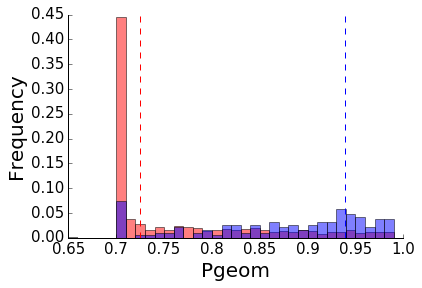

In [2]:
# Load Marshfield data
meta = pd.read_csv(os.path.join("../analyses/autosomal_validation", "sun_etal_msat_data_hg19_lobSTRcoords.bed"), sep="\t",
                   names=["chrom","start","end","motif","sunlength","denom","num"], usecols=range(4)+[4,5,6])
meta["period"] = meta["motif"].apply(len)
meta = meta[meta["denom"]>0]

data = LoadMLData(os.path.join(DATAPATH, "autosomal_validation", "sunetal_estimates_ml.bed"))
data = pd.merge(data, meta, on=["chrom","start","end"])

scalefactor = 0.47
truth = []
for period in [2, 4]:
    x = data[data["period"]==period]
    truth.append(np.log10(np.sum(x.num)*1.0/np.sum(x.denom))+np.log10(scalefactor))

def PlotBetaByPeriod(data, bcol, figname=None, eff=False, pgeom=False):
    dibeta = list(data[(data["period"]==2)&~np.isnan(data[bcol])][bcol].values)
    tetrabeta = list(data[(data["period"]==4)&~np.isnan(data[bcol])][bcol].values)
    if eff:
        dibeta = [(item*2.6) for item in dibeta]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if pgeom: bins = np.arange(0.65, 1, 0.01)
    else: bins = np.arange(0,1,0.02)
    ax.hist(dibeta, color="red", alpha=0.5, bins=bins, weights = np.ones_like(dibeta)/len(dibeta))
    ax.hist(tetrabeta, color="blue", alpha=0.5, bins=bins, weights = np.ones_like(tetrabeta)/len(tetrabeta))
    ax.axvline(np.median(dibeta), color="red", linestyle="dashed")
    ax.axvline(np.median(tetrabeta), color="blue", linestyle="dashed")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlim(left=min(bins), right=1)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left();
    ax.set_yticklabels(map(lambda x: "%0.2f"%x, ax.get_yticks()), size=15)
    ax.set_xticklabels(ax.get_xticks(), size=15)
    if pgeom: ax.set_xlabel("Pgeom", size=20)
    else: ax.set_xlabel("Beta", size=20)
    ax.set_ylabel("Frequency", size=20)
    print np.median(dibeta), np.median(tetrabeta), len(dibeta), len(tetrabeta)
    if figname is not None: fig.savefig(figname)
    
print "beta"
PlotBetaByPeriod(data, "est_beta_ml", figname=os.path.join(PLOTDIR, "SupplementalFigure10_marsh_beta.pdf"))
print "pgeom"
PlotBetaByPeriod(data, "est_pgeom_ml", pgeom=True, figname=os.path.join(PLOTDIR, "SupplementalFigure10_marsh_p.pdf"))